In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **DATA PROCESSING**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import compute_class_weight
import glob
import random


In [ ]:
def load_dataset(base_path):
    """
    Load the SisFall dataset from the specified directory and its subdirectories.
    """
    data = []
    labels = []

    for dirpath, _, filenames in os.walk(base_path):
        for file in filenames:
            if file.endswith('.txt'):
                file_path = os.path.join(dirpath, file)
                print(f'Processing file: {file_path}')

                label = 1 if file.startswith('F') else 0  # '1' for fall, '0' for no fall
                try:
                    with open(file_path, 'r') as f:
                        lines = f.readlines()
                        for line in lines:
                            if line.strip():
                                features = list(map(int, line.strip().rstrip(';').split(',')))
                                data.append(features)
                                labels.append(label)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    return np.array(data), np.array(labels)

In [ ]:
base_path = '/content/drive/MyDrive/DATASET_NEW/'

# LOAD DATASET

In [ ]:
X, y = load_dataset(base_path)

Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D02_SA01_R01.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D05_SA01_R01.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D05_SA01_R02.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D01_SA01_R01.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D06_SA01_R02.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D03_SA01_R01.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D05_SA01_R03.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D06_SA01_R01.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D04_SA01_R01.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D05_SA01_R04.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D05_SA01_R05.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D08_SA01_R05.txt
Processing file: /content/drive/MyDrive/DATASET_NEW/SA01/D07_SA01_R03.txt
Processing file: /content/drive/MyDriv

In [ ]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (12827111, 9)
Shape of y: (12827111,)


In [ ]:
#Checking distribution of the classes
unique, counts = np.unique(y, return_counts=True)
print(f'Class distribution: {dict(zip(unique, counts))}')

Class distribution: {0: 7433397, 1: 5393714}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## **Decision Tree algorithm**

In [ ]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

model = DecisionTreeClassifier(class_weight=class_weight_dict)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8628027670256277,
                                     1: 1.1890796397435979})

# PREDICTION

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.28%


In [ ]:
predictions = model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88   2230020
           1       0.84      0.84      0.84   1618114

    accuracy                           0.86   3848134
   macro avg       0.86      0.86      0.86   3848134
weighted avg       0.86      0.86      0.86   3848134



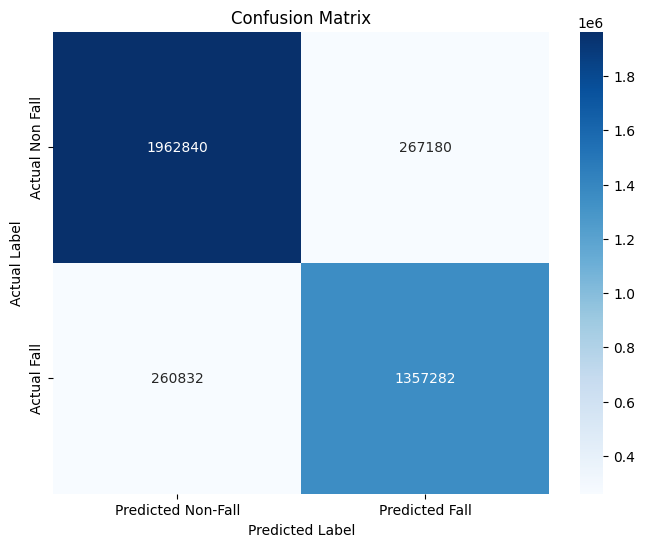

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)

print("Classification Report:")
print(classification_report(y_test, predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Fall', 'Predicted Fall'],
            yticklabels=['Actual Non Fall', 'Actual Fall'])

# Step 4: Add labels and title for clarity
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Display the heatmap
plt.show()

# **NOTIFICATION**

In [ ]:
import requests
import time

In [ ]:
def send_noti():
  url=f'https://blr1.blynk.cloud/external/api/update?token=4AE2c4TWTEMPlitmMg4Fhg-n2CVhlf1k&V0=1'
  response=requests.get(url)

  if response.status_code==200:
    print("Notification sent successfully!")
  else:
    print(f"Failed to send notification. Status code: {response.status_code}")

  time.sleep(5)
  url=f'https://blr1.blynk.cloud/external/api/update?token=4AE2c4TWTEMPlitmMg4Fhg-n2CVhlf1k&V0=0'
  response=requests.get(url)

  if response.status_code==200:
    print("Notification sent successfully!")
  else:
    print(f"Failed to send notification. Status code: {response.status_code}")

# **MQTT**

In [ ]:
!pip install paho-mqtt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
import time
import paho.mqtt.client as mqtt

In [ ]:
MQTT_BROKER = "broker.hivemq.com"
MQTT_PORT = 1883
MQTT_TOPIC = "sensors/mpug12fd"
sensor_values=[0,0,0,0,0,0,0,0,0]

In [ ]:
def on_message(client, userdata, msg):
    message="";
    message = msg.payload.decode()  # byto msg to string
    print(f"Message received: {message}")

    semicolon_split = message.split(';')

    for part in semicolon_split:
        if part.strip():
            comma_split = part.split(',')

            try:
                int_values = [int(float(i)) for i in comma_split]
            except ValueError as e:
                print(f"Error converting to int: {e}")
                continue

    sensor_values[0]=int_values[0]/8
    sensor_values[1]=int_values[1]/8
    sensor_values[2]=int_values[2]/8

    sensor_values[3]=int_values[3]
    sensor_values[4]=int_values[4]
    sensor_values[5]=int_values[5]

    sensor_values[6]=int_values[0]/8
    sensor_values[7]=int_values[1]/8
    sensor_values[8]=int_values[2]/8

    inputs_np = np.array(sensor_values)
    inputs_np = inputs_np.reshape(1, -1)

    predictions = model.predict(inputs_np)
    print(predictions)

    if(predictions==1):
      send_noti()


client = mqtt.Client()
client.on_message = on_message

client.connect(MQTT_BROKER, MQTT_PORT, 60)

client.subscribe(MQTT_TOPIC)

client.loop_start()

while True:
    time.sleep(3)

<ipython-input-23-de06fd38f310>:40: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()
